In [2]:
import pandas as pd

# Loading cleaned historical sales
cleaned_sales = pd.read_csv(r"C:\Users\cleaned_sales.csv", parse_dates=['InvoiceDate'])
cleaned_sales = cleaned_sales.set_index('InvoiceDate')

df_monthly = cleaned_sales['TotalSales'].resample('MS').sum()


C:\Users\GILL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


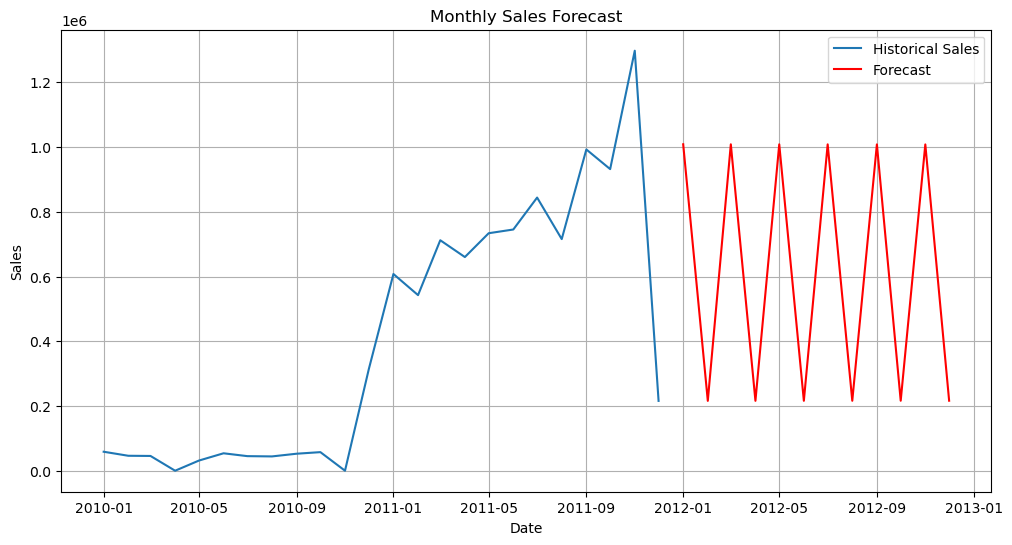

In [9]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv(r"C:\Users\cleaned_sales.csv", encoding='ISO-8859-1')

#  Aggregating monthly sales
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df_monthly = df.groupby('YearMonth')['TotalSales'].sum().reset_index()
df_monthly['YearMonth'] = df_monthly['YearMonth'].dt.to_timestamp()
df_monthly.set_index('YearMonth', inplace=True)



idx = pd.date_range(df_monthly.index.min(), df_monthly.index.max(), freq='MS')
df_monthly = df_monthly.reindex(idx, fill_value=0)
df_monthly.index.name = 'YearMonth'


sales = df_monthly['TotalSales']
model = ARIMA(sales, order=(1,1,1))  # starting point
model_fit = model.fit()


forecast = model_fit.forecast(steps=12)


plt.figure(figsize=(12,6))
plt.plot(sales, label='Historical Sales')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


